In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#@title >  Data [gdown] - train/val
import gdown, zipfile, os

# https://drive.google.com/file/d/167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3/view?usp=drive_link

file_id = '167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3'
output = 'file.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

output_dir = 'cloud'
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(output, 'r') as z:
  z.extractall(output_dir)

Downloading...
From (original): https://drive.google.com/uc?id=167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3
From (redirected): https://drive.google.com/uc?id=167q4k2tQJmyiSnlUGVFJL8ao4LHLDmN3&confirm=t&uuid=fdc91035-2e7a-4c4f-9a4c-ab9f22bd97a2
To: /content/file.zip
100%|██████████| 56.4M/56.4M [00:01<00:00, 49.3MB/s]


In [ ]:
# https://drive.google.com/file/d/1sko2j8PCTsliW5xdD7xvsMEvTIWfohn7/view?usp=drive_link

#@title Data [gdown] - test
import gdown, zipfile, os

file_id = '1sko2j8PCTsliW5xdD7xvsMEvTIWfohn7'
output = 'file.zip'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

output_dir = 'test'
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(output, 'r') as z:
  z.extractall(output_dir)

Downloading...
From: https://drive.google.com/uc?id=1sko2j8PCTsliW5xdD7xvsMEvTIWfohn7
To: /content/file.zip
100%|██████████| 14.9M/14.9M [00:00<00:00, 61.5MB/s]


In [11]:
#@title DataLoad (train/val)
from sklearn.model_selection import train_test_split
def load_data(base_dir='cloud/new_cloud'):
  images_path = []
  labels = []

  class_names = []

  for class_name in os.listdir(base_dir):
    class_name_path = os.path.join(base_dir, class_name)


    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        images_path.append(image_path)
        labels.append(class_name)

  return np.array(images_path), np.array(labels)

images_path, labels = load_data()
print(images_path.shape, labels.shape)
print(np.unique(labels))

(1232,) (1232,)
['Ac' 'As' 'Cb' 'Cc' 'Ci' 'Cs' 'Ct' 'Cu' 'Ns' 'Sc']


In [ ]:
#@title DataLoad (test)
from sklearn.model_selection import train_test_split
def load_data(base_dir='test/sample_test_cloud_img/test_cloud_img'):
  images_path = []
  labels = []

  class_names = []

  for class_name in os.listdir(base_dir):
    class_name_path = os.path.join(base_dir, class_name)


    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        images_path.append(image_path)
        labels.append(class_name)

  return np.array(images_path), np.array(labels)

test_images_path, test_labels = load_data()
print(test_images_path.shape,test_labels.shape)
print(np.unique(test_labels))

(37,) (37,)
['Ac' 'As' 'Cb' 'Cc' 'Ci' 'Cs' 'Ct' 'Cu' 'Ns' 'Sc']


In [ ]:
#@title DataLoad (test2)
from sklearn.model_selection import train_test_split
def load_data(base_dir='test/sample_test_cloud_img/sample_cloud_img'):
  images_path = []
  labels = []

  class_names = []

  for class_name in os.listdir(base_dir):
    class_name_path = os.path.join(base_dir, class_name)


    # 디렉토리인 경우만
    if os.path.isdir(class_name_path):
      for image_name in os.listdir(class_name_path):
        image_path = os.path.join(class_name_path, image_name)
        images_path.append(image_path)
        labels.append(class_name)

  return np.array(images_path), np.array(labels)

test_images2_path, test_labels2 = load_data()
print(test_images2_path.shape,test_labels2.shape)
print(np.unique(test_labels2))

(34,) (34,)
['Ac' 'As' 'Cb' 'Cc' 'Ci' 'Cs' 'Ct' 'Cu' 'Ns' 'Sc']


In [12]:
#@title train data split
from sklearn.model_selection  import train_test_split

split_images_path,test_images_path3,split_labels, test_labels3=train_test_split(images_path, labels, test_size=0.2, random_state=0)
train_images_path, val_images_path, train_labels, val_labels = train_test_split(split_images_path, split_labels, test_size=0.3, random_state=0)
train_images_path.shape, val_images_path.shape, train_labels.shape, val_labels.shape ,test_images_path3.shape,test_labels3.shape

((689,), (296,), (689,), (296,), (247,), (247,))

In [ ]:
train_labels[245]

'Cu'

In [13]:
#@title label에 대해 label_encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
train_labels = np.array(train_labels, dtype='int32')

val_labels = label_encoder.transform(val_labels)
val_labels = np.array(val_labels, dtype='int32')

test_labels3 = label_encoder.transform(test_labels3)
test_labels3 = np.array(test_labels3, dtype='int32')

In [ ]:
train_labels[245]

7

In [ ]:
#@title Only for train (CloudAugSequence)

In [14]:
#@title image_path to image_pixel (CloudSequence)

from tensorflow.keras.utils import Sequence
import cv2 # 이거 나중에 tensorflow로 바꿔

BATCH_SIZE = 32
IMAGE_SIZE = 224

class CloudSequence(Sequence):
  def __init__(self, images_path, labels, batch_size=BATCH_SIZE,
               image_size=IMAGE_SIZE, preprocess_function=None):
    self.images_path = images_path
    self.labels = labels
    self.batch_size = batch_size
    self.image_size = image_size
    self.preprocess_function = preprocess_function

  def __len__(self):
    return int(np.ceil(len(self.labels) / self.batch_size))

  def __getitem__(self, index):
    start = index * self.batch_size
    stop = (index + 1) * self.batch_size
    batch_images_path = self.images_path[start:stop]
    batch_labels = self.labels[start:stop]

    batch_images = np.zeros((batch_images_path.shape[0], self.image_size, self.image_size, 3), dtype=np.float32)

    for i,(image_path, label) in enumerate(zip(batch_images_path, batch_labels)):
        image = cv2.imread(image_path)
        image = cv2.resize(image, (self.image_size, self.image_size))
        # 스케일링
        if self.preprocess_function is not None:
          image = self.preprocess_function(image)
        batch_images[i]=image

    return (batch_images, batch_labels) if self.labels is not None else batch_images

In [15]:
from tensorflow.keras.applications.efficientnet import preprocess_input

tr_seq=CloudSequence(train_images_path, train_labels,preprocess_function=preprocess_input)
val_seq=CloudSequence(val_images_path, val_labels,preprocess_function=preprocess_input)
test_seq3=CloudSequence(test_images_path3,test_labels3,preprocess_function=preprocess_input)

In [ ]:
first_batch = next(iter(tr_seq))
print(first_batch[0].shape, first_batch[1].shape)
first_batch_val = next(iter(val_seq))
print(first_batch_val[0].shape, first_batch_val[1].shape)
first_batch_test = next(iter(test_seq))
print(first_batch_test[0].shape, first_batch_test[1].shape)

(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)


NameError: name 'test_seq' is not defined

In [ ]:
#@title : seq 객체 읽는 법
for i, (image, label) in enumerate(tr_seq):
  print(image.shape, label.shape)
  if i == 31:
    break

(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(32, 224, 224, 3) (32,)
(17, 224, 224, 3) (17,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)
(0, 224, 224, 3) (0,)


In [ ]:
#@title EfficientNet model 전이학습
from sklearn.model_selection import StratifiedShuffleSplit
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import layers, models

height = 224
width = 224
channels = 3
input_shape = (height, width, channels)
base_model = EfficientNetV2B0(weights="imagenet",include_top=False, input_shape=input_shape)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(base_model.input, output)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 224, 224, 3)    │              0 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 112, 112, 16)   │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 112, 112, 16)   │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 112, 112, 16)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, 56, 56, 64)     │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, 56, 56, 64)     │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, 56, 56, 64)     │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, 56, 56, 32)     │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, 56, 56, 32)     │            128 │ block2a_project_conv[… │
│ (BatchNormalization) 

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 5,871,514 (22.40 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [ ]:
#@title model_compile
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


early_stopping_cb = EarlyStopping(patience=6, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau_cb = ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)

In [ ]:
history = model.fit(
    tr_seq,
    epochs=30,
    validation_data=val_seq,
    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.4283 - loss: 1.7167 - val_accuracy: 0.6858 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.8373 - loss: 0.4868 - val_accuracy: 0.7027 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9436 - loss: 0.2020 - val_accuracy: 0.7196 - val_loss: 0.9010 - learning_rate: 0.0010
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9513 - loss: 0.1361 - val_accuracy: 0.6858 - val_loss: 1.3220 - learning_rate: 0.0010
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9541 - loss: 0.1321
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.9539 - loss: 0.1327 - val_accuracy: 0.6959 - val_loss: 1.1292 - learning_rate: 0.0010
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9693 - loss: 0.1007 - val_accurac

In [ ]:
model.save("EfficientNet_class10_final.keras")

In [ ]:
history_test=model.evaluate(test_seq3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.9315 - sparse_top_k_categorical_accuracy: 0.9977


In [5]:
from tensorflow.keras.models import load_model

model=load_model("EfficientNet_class10_final.keras")

In [20]:
pred_proba = model.predict(test_seq3.__getitem__(0)[0])
print(test_seq3.__getitem__(0)[1])
pred_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
[6 7 7 0 1 0 8 6 8 9 6 8 7 9 6 9 8 0 9 8 4 0 7 7 9 5 7 1 3 9 3 9]


array([[1.47538958e-03, 5.47182886e-03, 2.02202122e-03, 7.02640321e-03,
        1.32540047e-01, 8.21090303e-03, 8.33623052e-01, 3.29060014e-03,
        4.45875991e-03, 1.88099791e-03],
       [9.75372022e-05, 9.15530472e-05, 5.48253721e-03, 7.11509128e-05,
        8.47667689e-05, 3.57503231e-05, 1.19745448e-04, 9.92895186e-01,
        3.14760284e-04, 8.07055912e-04],
       [2.12966494e-04, 5.17910230e-04, 8.31337704e-04, 2.30126374e-04,
        9.19395185e-04, 1.53095447e-04, 3.95911426e-04, 9.95266318e-01,
        4.28401079e-04, 1.04447489e-03],
       [5.69350362e-01, 3.08807683e-03, 3.35372402e-03, 3.80726397e-01,
        1.69101134e-02, 5.25698951e-03, 8.09728727e-03, 4.31998260e-03,
        4.06363327e-03, 4.83347429e-03],
       [2.00287323e-03, 9.38174427e-01, 1.90395198e-03, 1.17704691e-03,
        9.80185461e-04, 4.91860881e-03, 9.68461682e-04, 3.95920273e-04,
        4.02459614e-02, 9.23252478e-03],
       [8.22013497e-01, 6.05502026e-03, 3.87797761e-03, 1.33850396e-01,
   

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 982ms/step
(247, 10)
[1 4 2 7 7 7 0 1 3 6 8 3 4 6 8 6 3 7 4 3 1 2 2 2 6 3 2 7 0 6 9 6 7 3 7 2 0
 7 2 1 6 7 4 7 8 1 7 7 8 7 7 9 1 7 3 8 0 7 7 7 7 9 0 6 9 1 7 3 4 2 2 1 8 4
 6 9 2 7 5 4 3 3 4 6 7 3 6 9 9 7 8 8 1 1 0 8 2 8 7 2 8 3 6 7 2 2 0 0 2 2 0
 2 8 8 6 7 8 0 6 2 0 0 2 9 3 7 2 1 2 3 4 1 3 8 2 6 9 9 3 6 7 7 4 7 0 3 1 4
 2 0 9 1 3 2 4 7 1 9 2 4 8 7 9 7 3 8 4 7 7 1 0 3 7 3 8 7 2 4 2 2 2 6 9 2 2
 8 4 2 7 6 4 7 3 6 8 7 6 2 2 2 8 1 4 7 2 3 3 8 7 2 9 7 9 1 7 0 4 2 7 9 8 1
 2 9 2 2 2 6 4 3 7 9 2 1 0 0 0 8 2 4 6 7 3 2 9 7 4]


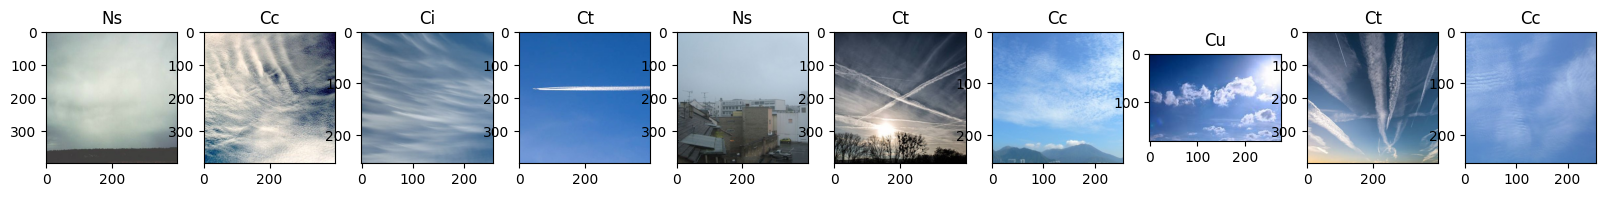

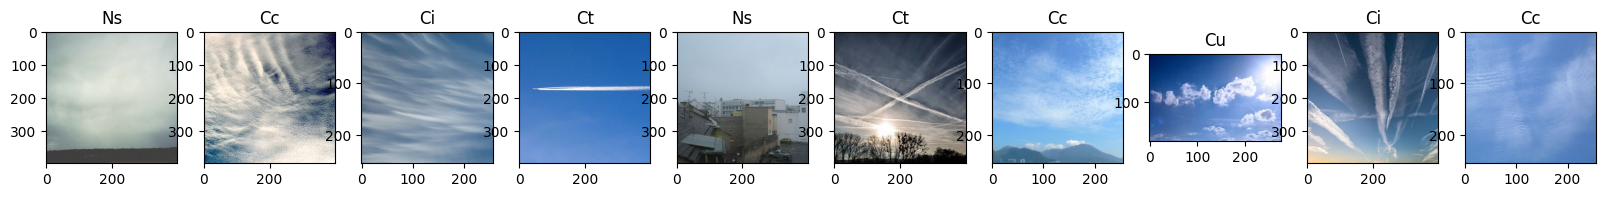

In [ ]:
# @title 모델 예측
import cv2
pred_proba = model.predict(test_seq3)
print(pred_proba.shape)

class_names = np.array(['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc'])

def show_images(images, labels, nrows=1,ncols = 10):
  fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 6))
  for j,(image_path, label) in enumerate(zip(images,labels)):
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[j].imshow(image)  # ndarray 전달해서 이미지 출력
    class_name = class_names[label]
    ax[j].set_title(class_name)

  plt.show()

pred = np.argmax(pred_proba, axis = 1)
print(pred)
show_images(test_images_path3[10:20],test_labels3[10:20])
show_images(test_images_path3[10:20], pred[10:20])
